# qrcode
Pure python QR Code generator - 
[PyPI project page](https://pypi.org/project/qrcode/)

## Installment

In [ ]:
# !pip install qrcode

## First Demo

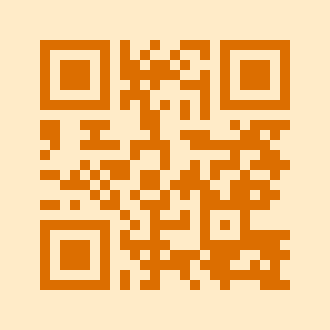

In [2]:
import qrcode

qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)
qr.add_data('https://github.com/hongyingyue')
qr.make(fit=True)

img = qr.make_image(back_color=(255, 235, 200), fill_color=(220, 110, 0))
# img = qr.make_image(back_color="#FFF5E1", fill_color="#FF6F00")

img
# img.save("hyy_github.png")

## Fancy styles

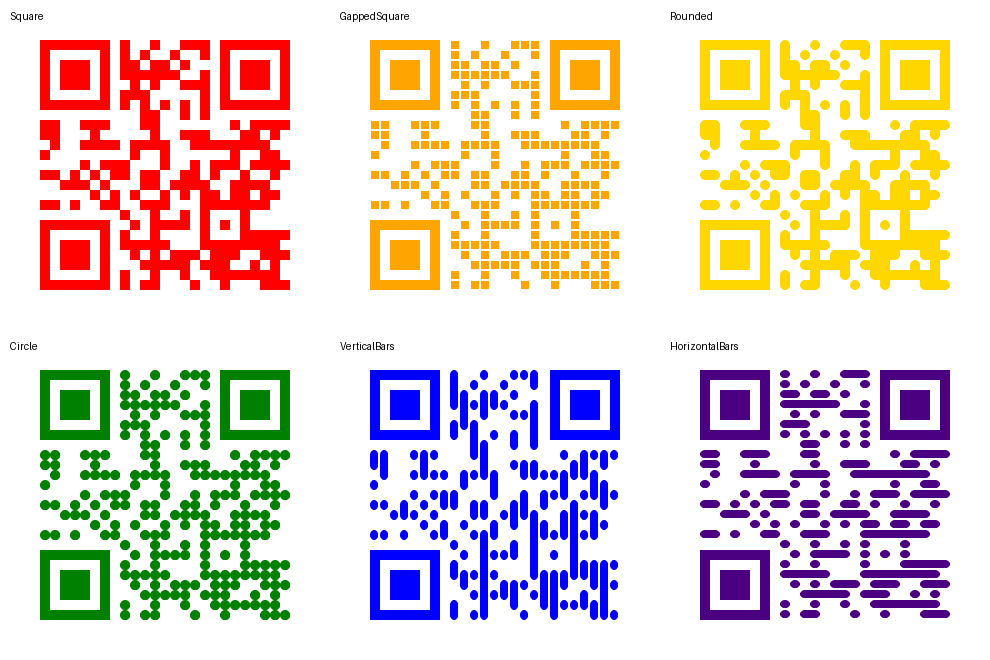

In [6]:
from PIL import Image, ImageDraw
import qrcode
from qrcode.image.styledpil import StyledPilImage
from qrcode.image.styles.colormasks import SolidFillColorMask
from qrcode.image.styles.moduledrawers import (
    SquareModuleDrawer,
    GappedSquareModuleDrawer,
    RoundedModuleDrawer,
    CircleModuleDrawer,
    VerticalBarsDrawer,
    HorizontalBarsDrawer
)
from IPython.display import display

# Module drawers and names
module_drawers = [
    ("Square", SquareModuleDrawer()),
    ("GappedSquare", GappedSquareModuleDrawer()),
    ("Rounded", RoundedModuleDrawer()),
    ("Circle", CircleModuleDrawer()),
    ("VerticalBars", VerticalBarsDrawer()),
    ("HorizontalBars", HorizontalBarsDrawer())
]

# Rainbow colors (ROYGBI) for front_color
rainbow_colors = [
    (255, 0, 0),       # Red
    (255, 165, 0),     # Orange
    (255, 215, 0),     # Yellow
    (0, 128, 0),       # Green
    (0, 0, 255),       # Blue
    (75, 0, 130)       # Indigo
]

# Create base QRCode instance
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)
qr.add_data("https://github.com/hongyingyue")
qr.make(fit=True)

# Generate images
qr_images = []
for (name, drawer), color in zip(module_drawers, rainbow_colors):
    img = qr.make_image(
        image_factory=StyledPilImage,
        module_drawer=drawer,
        color_mask=SolidFillColorMask(back_color=(255, 255, 255), front_color=color),
    ).convert("RGB")
    
    draw = ImageDraw.Draw(img)
    draw.text((10, 10), name, fill=(0, 0, 0))  # label
    qr_images.append(img)

# Create 2x3 grid
img_width, img_height = qr_images[0].size
grid_img = Image.new("RGB", (img_width * 3, img_height * 2), (255, 255, 255))

for idx, img in enumerate(qr_images):
    x = (idx % 3) * img_width
    y = (idx // 3) * img_height
    grid_img.paste(img, (x, y))

# Show or save
grid_img.show()
# grid_img.save("qr_rainbow_styles.png")

# Display the image in notebook
display(grid_img)